**Predictive Modeling of Agricultural Input Loan Default ("Impaye") for Smallholder Farmers in Benin using Machine Learning and Agricultural Input Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # needed to enable IterativeImputer
from sklearn.impute import IterativeImputer


In [2]:
data = pd.read_excel("data_agro.xlsx", na_values="-")

In [3]:
pd.set_option("display.max_columns",1000),
pd.set_option('display.max_rows', 1000)

In [4]:
data.head()

,N° ORDRE,NPKSB COTON,UREE,SSP COTON,NPKSB MAÏS,KILLERS 480SL,COTOCHEM G560SC,DEAL 11 OD,DEAL Plus 11 OD,JACOBIA 350 EC,THALIS 112EC,CORAGEN,BELLA 424EC,BELT EXPERT,SAFARI GOLD,COTONIX 328EC,ULVA+,BERTHOUD C5,MATABI,NPKSB COTON.1,UREE.1,SSP COTON.1,NPKSB MAÏS.1,KILLERS 480SL.1,COTOCHEM G560SC.1,DEAL 11 OD.1,DEAL Plus 11 OD.1,JACOBIA 350 EC .1,THALIS 112EC.1,CORAGEN.1,BELLA 424EC.1,BELT EXPERT.1,SAFARI GOLD .1,COTONIX 328EC.1,ULVA+.1,BERTHOUD C5.1,MATABI.1,VALEUR DETTE INTRANTS,CREDIT IMF,CREDIT RECOLTE,DETTE ANTERIEURE,AUTRES DETTES,RETENUE DE FRANCS,retenus,DETTES TOTALES DU PRODUCTEUR,TONNAGE COMMERCIALISE (1er CHOIX EN KG),TONNAGE COMMERCIALISE (2èm CHOIX EN KG),VALEUR DU TONNAGE COMMERCIALISE PAR LE PRODUCTEUR,NETTE A PERCEVOIR PAR LE PRODUCTEUR,RATIO D'ENDETTEMENT,A PERCEVOIR,IMPAYE,Statut
0,1,73,73.0,36.0,27.0,96,90,10.0,10.0,141.0,240.0,61.0,32.0,60.0,228.0,20.0,0.0,0.0,0.0,1241000,1095000,504000,459000,336000,675000,70110,80000,493500,840000,213500,112000,210000,798000,80000,0,0,0,7207110,1725000.0,NaN,NaN,NaN,223230,7.0,9155340,31890.0,NaN,9567000,411660,0.753330,411660,0,perçoit
1,2,60,32.0,38.0,13.0,66,33,12.0,0.0,48.0,120.0,30.0,0.0,0.0,40.0,24.0,0.0,0.0,0.0,1020000,480000,532000,221000,231000,247500,84132,0,168000,420000,105000,0,0,140000,96000,0,0,0,3744632,660000.0,NaN,NaN,NaN,127316,7.0,4531948,18188.0,NaN,5456400,924452,0.686283,924452,0,perçoit
2,3,20,10.0,26.0,0.0,20,20,3.0,4.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340000,150000,364000,0,70000,150000,21033,32000,0,280000,0,0,0,0,0,0,0,0,1407033,NaN,NaN,NaN,NaN,59689,7.0,1466722,8527.0,NaN,2558100,1091378,0.550030,1091378,0,perçoit
3,4,22,17.0,12.0,6.0,20,10,3.0,1.0,14.0,40.0,20.0,5.0,0.0,30.0,10.0,0.0,0.0,0.0,374000,255000,168000,102000,70000,75000,21033,8000,49000,140000,70000,17500,0,105000,40000,0,0,0,1494533,NaN,NaN,NaN,NaN,56735,7.0,1551268,8105.0,NaN,2431500,880232,0.614655,880232,0,perçoit
4,5,180,60.0,110.0,100.0,100,70,20.0,10.0,48.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3060000,900000,1540000,1700000,350000,525000,140220,80000,168000,1120000,0,0,0,0,0,0,0,0,9583220,NaN,NaN,NaN,NaN,276017,7.0,9859237,39431.0,NaN,11829300,1970063,0.810126,1970063,0,perçoit


In [5]:
#Number of line and columns
print(data.shape)

(227, 53)


In [6]:
print(data.columns)

Index(['N° ORDRE', 'NPKSB COTON', 'UREE', 'SSP COTON', 'NPKSB MAÏS',
       'KILLERS 480SL', 'COTOCHEM G560SC', 'DEAL 11 OD', 'DEAL Plus 11 OD',
       'JACOBIA 350 EC ', 'THALIS 112EC', 'CORAGEN', 'BELLA 424EC',
       'BELT EXPERT', 'SAFARI GOLD ', 'COTONIX 328EC', 'ULVA+', 'BERTHOUD C5',
       'MATABI', 'NPKSB COTON.1', 'UREE.1', 'SSP COTON.1', 'NPKSB MAÏS.1',
       'KILLERS 480SL.1', 'COTOCHEM G560SC.1', 'DEAL 11 OD.1',
       'DEAL Plus 11 OD.1', 'JACOBIA 350 EC .1', 'THALIS 112EC.1', 'CORAGEN.1',
       'BELLA 424EC.1', 'BELT EXPERT.1', 'SAFARI GOLD .1', 'COTONIX 328EC.1',
       'ULVA+.1', 'BERTHOUD C5.1', 'MATABI.1', 'VALEUR DETTE INTRANTS',
       'CREDIT IMF', 'CREDIT RECOLTE', 'DETTE ANTERIEURE', 'AUTRES DETTES',
       'RETENUE DE FRANCS', 'retenus', 'DETTES TOTALES DU PRODUCTEUR',
       'TONNAGE COMMERCIALISE  (1er CHOIX EN KG)',
       'TONNAGE COMMERCIALISE (2èm CHOIX EN KG)',
       'VALEUR DU TONNAGE COMMERCIALISE PAR LE PRODUCTEUR',
       'NETTE A PERCEVOIR PAR LE

In [7]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

CREDIT RECOLTE                              226
DETTE ANTERIEURE                            226
AUTRES DETTES                               226
TONNAGE COMMERCIALISE (2èm CHOIX EN KG)     226
CREDIT IMF                                  197
RATIO D'ENDETTEMENT                          42
TONNAGE COMMERCIALISE  (1er CHOIX EN KG)     42
BERTHOUD C5                                   7
MATABI                                        7
ULVA+                                         6
SAFARI GOLD                                   6
COTONIX 328EC                                 6
BELLA 424EC                                   6
BELT EXPERT                                   6
CORAGEN                                       6
DEAL 11 OD                                    5
JACOBIA 350 EC                                5
DEAL Plus 11 OD                               5
THALIS 112EC                                  5
NPKSB MAÏS                                    1
SSP COTON                               

In [8]:
data = data.drop(data.index[-1])

In [9]:
data = data.drop(['TONNAGE COMMERCIALISE (2èm CHOIX EN KG)', 'AUTRES DETTES', 'DETTE ANTERIEURE', 'CREDIT RECOLTE'], axis=1)

In [10]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

CREDIT IMF                                  197
TONNAGE COMMERCIALISE  (1er CHOIX EN KG)     42
RATIO D'ENDETTEMENT                          42
BERTHOUD C5                                   7
MATABI                                        7
ULVA+                                         6
SAFARI GOLD                                   6
BELLA 424EC                                   6
CORAGEN                                       6
BELT EXPERT                                   6
COTONIX 328EC                                 6
THALIS 112EC                                  5
JACOBIA 350 EC                                5
DEAL 11 OD                                    5
DEAL Plus 11 OD                               5
UREE                                          1
SSP COTON                                     1
NPKSB MAÏS                                    1
dtype: int64


In [11]:
data = data.drop(["MATABI"], axis=1)

In [12]:
data = data.drop(["BERTHOUD C5"], axis=1)

In [13]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

CREDIT IMF                                  197
TONNAGE COMMERCIALISE  (1er CHOIX EN KG)     42
RATIO D'ENDETTEMENT                          42
CORAGEN                                       6
BELLA 424EC                                   6
BELT EXPERT                                   6
SAFARI GOLD                                   6
COTONIX 328EC                                 6
ULVA+                                         6
JACOBIA 350 EC                                5
DEAL 11 OD                                    5
DEAL Plus 11 OD                               5
THALIS 112EC                                  5
SSP COTON                                     1
NPKSB MAÏS                                    1
UREE                                          1
dtype: int64


In [14]:
data = data.drop(['ULVA+.1', 'BERTHOUD C5.1', 'MATABI.1'], axis=1)

In [15]:
data = data.drop(["retenus","N° ORDRE","CREDIT IMF"], axis=1)

In [16]:
data.replace('-', np.nan, inplace=True)

In [17]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

TONNAGE COMMERCIALISE  (1er CHOIX EN KG)    42
RATIO D'ENDETTEMENT                         42
ULVA+                                        6
BELLA 424EC                                  6
CORAGEN                                      6
BELT EXPERT                                  6
SAFARI GOLD                                  6
COTONIX 328EC                                6
DEAL 11 OD                                   5
JACOBIA 350 EC                               5
DEAL Plus 11 OD                              5
THALIS 112EC                                 5
SSP COTON                                    1
NPKSB MAÏS                                   1
UREE                                         1
dtype: int64


In [18]:
data.shape

(226, 41)

In [19]:
data.head()

,NPKSB COTON,UREE,SSP COTON,NPKSB MAÏS,KILLERS 480SL,COTOCHEM G560SC,DEAL 11 OD,DEAL Plus 11 OD,JACOBIA 350 EC,THALIS 112EC,CORAGEN,BELLA 424EC,BELT EXPERT,SAFARI GOLD,COTONIX 328EC,ULVA+,NPKSB COTON.1,UREE.1,SSP COTON.1,NPKSB MAÏS.1,KILLERS 480SL.1,COTOCHEM G560SC.1,DEAL 11 OD.1,DEAL Plus 11 OD.1,JACOBIA 350 EC .1,THALIS 112EC.1,CORAGEN.1,BELLA 424EC.1,BELT EXPERT.1,SAFARI GOLD .1,COTONIX 328EC.1,VALEUR DETTE INTRANTS,RETENUE DE FRANCS,DETTES TOTALES DU PRODUCTEUR,TONNAGE COMMERCIALISE (1er CHOIX EN KG),VALEUR DU TONNAGE COMMERCIALISE PAR LE PRODUCTEUR,NETTE A PERCEVOIR PAR LE PRODUCTEUR,RATIO D'ENDETTEMENT,A PERCEVOIR,IMPAYE,Statut
0,73,73.0,36.0,27.0,96,90,10.0,10.0,141.0,240.0,61.0,32.0,60.0,228.0,20.0,0.0,1241000,1095000,504000,459000,336000,675000,70110,80000,493500,840000,213500,112000,210000,798000,80000,7207110,223230,9155340,31890.0,9567000,411660,0.753330,411660,0,perçoit
1,60,32.0,38.0,13.0,66,33,12.0,0.0,48.0,120.0,30.0,0.0,0.0,40.0,24.0,0.0,1020000,480000,532000,221000,231000,247500,84132,0,168000,420000,105000,0,0,140000,96000,3744632,127316,4531948,18188.0,5456400,924452,0.686283,924452,0,perçoit
2,20,10.0,26.0,0.0,20,20,3.0,4.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,340000,150000,364000,0,70000,150000,21033,32000,0,280000,0,0,0,0,0,1407033,59689,1466722,8527.0,2558100,1091378,0.550030,1091378,0,perçoit
3,22,17.0,12.0,6.0,20,10,3.0,1.0,14.0,40.0,20.0,5.0,0.0,30.0,10.0,0.0,374000,255000,168000,102000,70000,75000,21033,8000,49000,140000,70000,17500,0,105000,40000,1494533,56735,1551268,8105.0,2431500,880232,0.614655,880232,0,perçoit
4,180,60.0,110.0,100.0,100,70,20.0,10.0,48.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,3060000,900000,1540000,1700000,350000,525000,140220,80000,168000,1120000,0,0,0,0,0,9583220,276017,9859237,39431.0,11829300,1970063,0.810126,1970063,0,perçoit


In [20]:
data.columns

Index(['NPKSB COTON', 'UREE', 'SSP COTON', 'NPKSB MAÏS', 'KILLERS 480SL',
       'COTOCHEM G560SC', 'DEAL 11 OD', 'DEAL Plus 11 OD', 'JACOBIA 350 EC ',
       'THALIS 112EC', 'CORAGEN', 'BELLA 424EC', 'BELT EXPERT', 'SAFARI GOLD ',
       'COTONIX 328EC', 'ULVA+', 'NPKSB COTON.1', 'UREE.1', 'SSP COTON.1',
       'NPKSB MAÏS.1', 'KILLERS 480SL.1', 'COTOCHEM G560SC.1', 'DEAL 11 OD.1',
       'DEAL Plus 11 OD.1', 'JACOBIA 350 EC .1', 'THALIS 112EC.1', 'CORAGEN.1',
       'BELLA 424EC.1', 'BELT EXPERT.1', 'SAFARI GOLD .1', 'COTONIX 328EC.1',
       'VALEUR DETTE INTRANTS', 'RETENUE DE FRANCS',
       'DETTES TOTALES DU PRODUCTEUR',
       'TONNAGE COMMERCIALISE  (1er CHOIX EN KG)',
       'VALEUR DU TONNAGE COMMERCIALISE PAR LE PRODUCTEUR',
       'NETTE A PERCEVOIR PAR LE PRODUCTEUR', 'RATIO D'ENDETTEMENT',
       'A PERCEVOIR', 'IMPAYE', 'Statut'],
      dtype='object')

In [21]:
data.head()

,NPKSB COTON,UREE,SSP COTON,NPKSB MAÏS,KILLERS 480SL,COTOCHEM G560SC,DEAL 11 OD,DEAL Plus 11 OD,JACOBIA 350 EC,THALIS 112EC,CORAGEN,BELLA 424EC,BELT EXPERT,SAFARI GOLD,COTONIX 328EC,ULVA+,NPKSB COTON.1,UREE.1,SSP COTON.1,NPKSB MAÏS.1,KILLERS 480SL.1,COTOCHEM G560SC.1,DEAL 11 OD.1,DEAL Plus 11 OD.1,JACOBIA 350 EC .1,THALIS 112EC.1,CORAGEN.1,BELLA 424EC.1,BELT EXPERT.1,SAFARI GOLD .1,COTONIX 328EC.1,VALEUR DETTE INTRANTS,RETENUE DE FRANCS,DETTES TOTALES DU PRODUCTEUR,TONNAGE COMMERCIALISE (1er CHOIX EN KG),VALEUR DU TONNAGE COMMERCIALISE PAR LE PRODUCTEUR,NETTE A PERCEVOIR PAR LE PRODUCTEUR,RATIO D'ENDETTEMENT,A PERCEVOIR,IMPAYE,Statut
0,73,73.0,36.0,27.0,96,90,10.0,10.0,141.0,240.0,61.0,32.0,60.0,228.0,20.0,0.0,1241000,1095000,504000,459000,336000,675000,70110,80000,493500,840000,213500,112000,210000,798000,80000,7207110,223230,9155340,31890.0,9567000,411660,0.753330,411660,0,perçoit
1,60,32.0,38.0,13.0,66,33,12.0,0.0,48.0,120.0,30.0,0.0,0.0,40.0,24.0,0.0,1020000,480000,532000,221000,231000,247500,84132,0,168000,420000,105000,0,0,140000,96000,3744632,127316,4531948,18188.0,5456400,924452,0.686283,924452,0,perçoit
2,20,10.0,26.0,0.0,20,20,3.0,4.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,340000,150000,364000,0,70000,150000,21033,32000,0,280000,0,0,0,0,0,1407033,59689,1466722,8527.0,2558100,1091378,0.550030,1091378,0,perçoit
3,22,17.0,12.0,6.0,20,10,3.0,1.0,14.0,40.0,20.0,5.0,0.0,30.0,10.0,0.0,374000,255000,168000,102000,70000,75000,21033,8000,49000,140000,70000,17500,0,105000,40000,1494533,56735,1551268,8105.0,2431500,880232,0.614655,880232,0,perçoit
4,180,60.0,110.0,100.0,100,70,20.0,10.0,48.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,3060000,900000,1540000,1700000,350000,525000,140220,80000,168000,1120000,0,0,0,0,0,9583220,276017,9859237,39431.0,11829300,1970063,0.810126,1970063,0,perçoit


In [22]:
data.shape

(226, 41)

In [23]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

TONNAGE COMMERCIALISE  (1er CHOIX EN KG)    42
RATIO D'ENDETTEMENT                         42
ULVA+                                        6
BELLA 424EC                                  6
CORAGEN                                      6
BELT EXPERT                                  6
SAFARI GOLD                                  6
COTONIX 328EC                                6
DEAL 11 OD                                   5
JACOBIA 350 EC                               5
DEAL Plus 11 OD                              5
THALIS 112EC                                 5
SSP COTON                                    1
NPKSB MAÏS                                   1
UREE                                         1
dtype: int64


In [24]:
data = data.drop(data.index[-1])

In [25]:
data_negativeno = data.copy()

In [80]:
# # Receivable amounts (only positive)
# data_negativeno['A_PERCEVOIR'] = data_negativeno['NETTE A PERCEVOIR PAR LE PRODUCTEUR'].clip(lower=0)

# Payable amounts (absolute value of negatives)
# data_negativeno['A_PAYER'] = data_negativeno['NETTE A PERCEVOIR PAR LE PRODUCTEUR'].clip(upper=0).abs()


In [81]:
# Binary encoding




In [26]:
data_negativeno.drop("NETTE A PERCEVOIR PAR LE PRODUCTEUR", axis=1, inplace=True)

In [27]:
data_negativeno.drop('Statut', axis=1, errors='ignore', inplace=True)

<Axes: ylabel='count'>

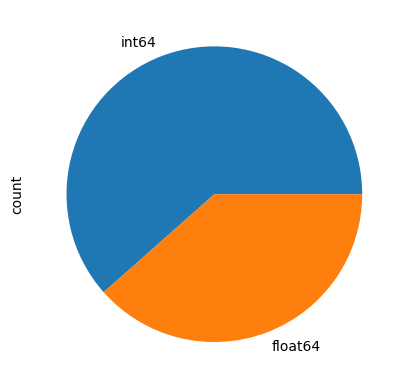

In [28]:
data_negativeno.dtypes.value_counts().plot.pie()

In [29]:
# Get numeric columns
numeric_cols = data_negativeno.select_dtypes(include=['int64', 'float64']).columns

# Optionally, drop the target and other leakage columns
numeric_cols = numeric_cols.drop(['IMPAYE', 'Statut', 'A_PAYER'], errors='ignore')

# Fill missing values with median
for col in numeric_cols:
    median_val = data_negativeno[col].median()
    data_negativeno[col] = data_negativeno[col].fillna(median_val)

# Check if any missing values remain
missing_val = data_negativeno.isna().sum()
print(missing_val[missing_val > 0])



Series([], dtype: int64)


In [30]:
data_negativeno['IMPAYE'] = data_negativeno['IMPAYE'].apply(lambda x: 1 if x < 0 else 0)


In [46]:
data_negativeno.head(20)

,NPKSB COTON,UREE,SSP COTON,NPKSB MAÏS,KILLERS 480SL,COTOCHEM G560SC,DEAL 11 OD,DEAL Plus 11 OD,JACOBIA 350 EC,THALIS 112EC,CORAGEN,BELLA 424EC,BELT EXPERT,SAFARI GOLD,COTONIX 328EC,ULVA+,NPKSB COTON.1,UREE.1,SSP COTON.1,NPKSB MAÏS.1,KILLERS 480SL.1,COTOCHEM G560SC.1,DEAL 11 OD.1,DEAL Plus 11 OD.1,JACOBIA 350 EC .1,THALIS 112EC.1,CORAGEN.1,BELLA 424EC.1,BELT EXPERT.1,SAFARI GOLD .1,COTONIX 328EC.1,VALEUR DETTE INTRANTS,RETENUE DE FRANCS,DETTES TOTALES DU PRODUCTEUR,TONNAGE COMMERCIALISE (1er CHOIX EN KG),VALEUR DU TONNAGE COMMERCIALISE PAR LE PRODUCTEUR,RATIO D'ENDETTEMENT,A PERCEVOIR,IMPAYE
0,73,73.0,36.0,27.0,96,90,10.0,10.0,141.0,240.0,61.0,32.0,60.0,228.0,20.0,0.0,1241000,1095000,504000,459000,336000,675000,70110,80000,493500,840000,213500,112000,210000,798000,80000,7207110,223230,9155340,31890.0,9567000,0.753330,411660,0
1,60,32.0,38.0,13.0,66,33,12.0,0.0,48.0,120.0,30.0,0.0,0.0,40.0,24.0,0.0,1020000,480000,532000,221000,231000,247500,84132,0,168000,420000,105000,0,0,140000,96000,3744632,127316,4531948,18188.0,5456400,0.686283,924452,0
2,20,10.0,26.0,0.0,20,20,3.0,4.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,340000,150000,364000,0,70000,150000,21033,32000,0,280000,0,0,0,0,0,1407033,59689,1466722,8527.0,2558100,0.550030,1091378,0
3,22,17.0,12.0,6.0,20,10,3.0,1.0,14.0,40.0,20.0,5.0,0.0,30.0,10.0,0.0,374000,255000,168000,102000,70000,75000,21033,8000,49000,140000,70000,17500,0,105000,40000,1494533,56735,1551268,8105.0,2431500,0.614655,880232,0
4,180,60.0,110.0,100.0,100,70,20.0,10.0,48.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,3060000,900000,1540000,1700000,350000,525000,140220,80000,168000,1120000,0,0,0,0,0,9583220,276017,9859237,39431.0,11829300,0.810126,1970063,0
5,40,20.0,60.0,0.0,0,30,15.0,0.0,48.0,160.0,200.0,0.0,0.0,0.0,48.0,0.0,680000,300000,840000,0,0,225000,105165,0,168000,560000,700000,0,0,0,192000,3770165,180320,3950485,25760.0,7728000,0.487858,3777515,0
6,6,4.0,2.0,0.0,3,3,2.0,0.0,0.0,10.0,0.0,0.0,0.0,8.0,0.0,0.0,102000,60000,28000,0,10500,22500,14022,0,0,35000,0,0,0,28000,0,300022,0,300022,4300.0,0,0.759047,0,1
7,50,20.0,28.0,10.0,20,30,10.0,0.0,48.0,100.0,20.0,0.0,20.0,30.0,0.0,0.0,850000,300000,392000,170000,70000,225000,70110,0,168000,350000,70000,0,70000,105000,0,2840110,150605,2990715,21515.0,6454500,0.440020,3463785,0
8,20,11.0,14.0,10.0,30,20,5.0,0.0,31.0,50.0,52.0,0.0,15.0,65.0,6.0,0.0,340000,165000,196000,170000,105000,150000,35055,0,108500,175000,182000,0,52500,227500,24000,1930555,28091,1958646,4013.0,1203900,1.603584,0,1
9,22,10.0,14.0,5.0,30,20,6.0,0.0,31.0,45.0,15.0,10.0,0.0,60.0,5.0,0.0,374000,150000,196000,85000,105000,150000,42066,0,108500,157500,52500,35000,0,210000,20000,1685566,0,2030566,4300.0,0,0.759047,0,1


In [31]:
# # Get numeric columns from the cleaned DataFrame
# numeric_cols = data_negativeno.select_dtypes(include=['int64', 'float64']).columns

# # Drop the target column from features
# numeric_cols = numeric_cols.drop('IMPAYE', errors='ignore')  # 'errors="ignore"' avoids error if column not found

# # Apply imputer on the numeric features
# iter_imputer = IterativeImputer(max_iter=10, random_state=42, initial_strategy='median')
# data_negativeno = iter_imputer.fit_transform(data_negativeno[numeric_cols])
# data_negativeno = pd.DataFrame(data_negativeno, columns=numeric_cols)


In [32]:
missing_val = data_negativeno.isna().sum()
missing_vale = missing_val[missing_val>0].sort_values(ascending = False)
print(missing_vale)

Series([], dtype: int64)


In [33]:
data_negativeno.head()

,NPKSB COTON,UREE,SSP COTON,NPKSB MAÏS,KILLERS 480SL,COTOCHEM G560SC,DEAL 11 OD,DEAL Plus 11 OD,JACOBIA 350 EC,THALIS 112EC,CORAGEN,BELLA 424EC,BELT EXPERT,SAFARI GOLD,COTONIX 328EC,ULVA+,NPKSB COTON.1,UREE.1,SSP COTON.1,NPKSB MAÏS.1,KILLERS 480SL.1,COTOCHEM G560SC.1,DEAL 11 OD.1,DEAL Plus 11 OD.1,JACOBIA 350 EC .1,THALIS 112EC.1,CORAGEN.1,BELLA 424EC.1,BELT EXPERT.1,SAFARI GOLD .1,COTONIX 328EC.1,VALEUR DETTE INTRANTS,RETENUE DE FRANCS,DETTES TOTALES DU PRODUCTEUR,TONNAGE COMMERCIALISE (1er CHOIX EN KG),VALEUR DU TONNAGE COMMERCIALISE PAR LE PRODUCTEUR,RATIO D'ENDETTEMENT,A PERCEVOIR,IMPAYE
0,73,73.0,36.0,27.0,96,90,10.0,10.0,141.0,240.0,61.0,32.0,60.0,228.0,20.0,0.0,1241000,1095000,504000,459000,336000,675000,70110,80000,493500,840000,213500,112000,210000,798000,80000,7207110,223230,9155340,31890.0,9567000,0.753330,411660,0
1,60,32.0,38.0,13.0,66,33,12.0,0.0,48.0,120.0,30.0,0.0,0.0,40.0,24.0,0.0,1020000,480000,532000,221000,231000,247500,84132,0,168000,420000,105000,0,0,140000,96000,3744632,127316,4531948,18188.0,5456400,0.686283,924452,0
2,20,10.0,26.0,0.0,20,20,3.0,4.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,340000,150000,364000,0,70000,150000,21033,32000,0,280000,0,0,0,0,0,1407033,59689,1466722,8527.0,2558100,0.550030,1091378,0
3,22,17.0,12.0,6.0,20,10,3.0,1.0,14.0,40.0,20.0,5.0,0.0,30.0,10.0,0.0,374000,255000,168000,102000,70000,75000,21033,8000,49000,140000,70000,17500,0,105000,40000,1494533,56735,1551268,8105.0,2431500,0.614655,880232,0
4,180,60.0,110.0,100.0,100,70,20.0,10.0,48.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,3060000,900000,1540000,1700000,350000,525000,140220,80000,168000,1120000,0,0,0,0,0,9583220,276017,9859237,39431.0,11829300,0.810126,1970063,0


In [34]:
data_use = data_negativeno.copy()

In [35]:
data_use = data_negativeno.drop('A PERCEVOIR', axis=1)

**Here we are training our model**

In [36]:
data_clean = data_negativeno.copy()

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
X = data_use.drop('IMPAYE', axis=1)
y = data_use['IMPAYE']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.85      0.85      0.85        20

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45

[[22  3]
 [ 3 17]]


Model using logistic Regression 

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        20

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[25  0]
 [ 0 20]]


XGBoost model prediction

In [43]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


/home/liwa/anaconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:30:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.85      0.85      0.85        20

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45

[[22  3]
 [ 3 17]]


KNN model prediction

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.94      0.80      0.86        20

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.89      0.89      0.89        45

[[24  1]
 [ 4 16]]


In [45]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


MLP Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.83      0.95      0.88        20

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45

[[21  4]
 [ 1 19]]
